# SparseEdges tests: testing different parameters


For a full tutorial on Matching Pursuit, see http://blog.invibe.net/posts/2015-05-22-a-hitchhiker-guide-to-matching-pursuit.html.



In [1]:
%load_ext autoreload
%autoreload 2

from __future__ import division, print_function
%matplotlib notebook

import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [2]:
%cd -q ../test

## Testing MP_alpha

In [3]:
%%writefile experiment_test_MP_alpha.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

Testing some parameters of the SparseEdges framework on its efficiency.

rm -fr cache/edges/testing_* cache/testing_* results/edges/testing_* results/testing_*
frioul_batch  -n "14,15,16"  -M 36 'python experiment_test_parameters.py'
frioul_batch -M 200 'python experiment_test_parameters.py'

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
import numpy as np
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)

from SparseEdges import SparseEdges

# TODO: here, we are more interested in the processing of the database, not the comparison - use the correct function
# TODO : annotate the efficiency of different LogGabor bases (RMSE?)
# TODO: make a circular mask to avoid border effects coming with whitening...

#! comparing databases
#!--------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.N = 128
mp.pe.datapath = '../../SLIP/database/'
mp.process('testing_vanilla')
# TODO: CRF
mp.process('testing_noise', noise=mp.pe.noise)
mp.process('testing_vanilla', name_database='serre07_targets')

# TODO : make an experiment showing that using scale does not bring much
mps, experiments = [], []
v_alpha = np.linspace(0.3, 1., 9)
for MP_alpha in v_alpha:
    mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp.N = 128
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.MP_alpha = MP_alpha
    mp.init()
    exp = 'testing_MP_alpha_' + str(MP_alpha).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)
    
import matplotlib.pyplot as plt
fig_width_pt = 900 #318.670*.61 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

threshold = None
threshold = .25
databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % MP_alpha for MP_alpha in v_alpha]
fig = plt.figure(figsize=(fig_width, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps,
                  experiments=experiments, databases=databases, labels=labels, 
                  fig=fig, color=[0., 1., 0.], threshold=threshold, scale=True)    
a.set_xlabel(r' $MP_{alpha}$')

import os
mp.savefig(fig, os.path.join(mp.pe.figpath, 'testing_MP_alpha'), display=True)
        
## TODO:  would be interesting to see how that changes with number of image patches used, i.e. whether it settles down to that particular pattern or just jumps around.


Overwriting experiment_test_MP_alpha.py


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:1398: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


AttributeError: 'ParameterSet' object has no attribute 'formats'

<IPython.core.display.Javascript object>


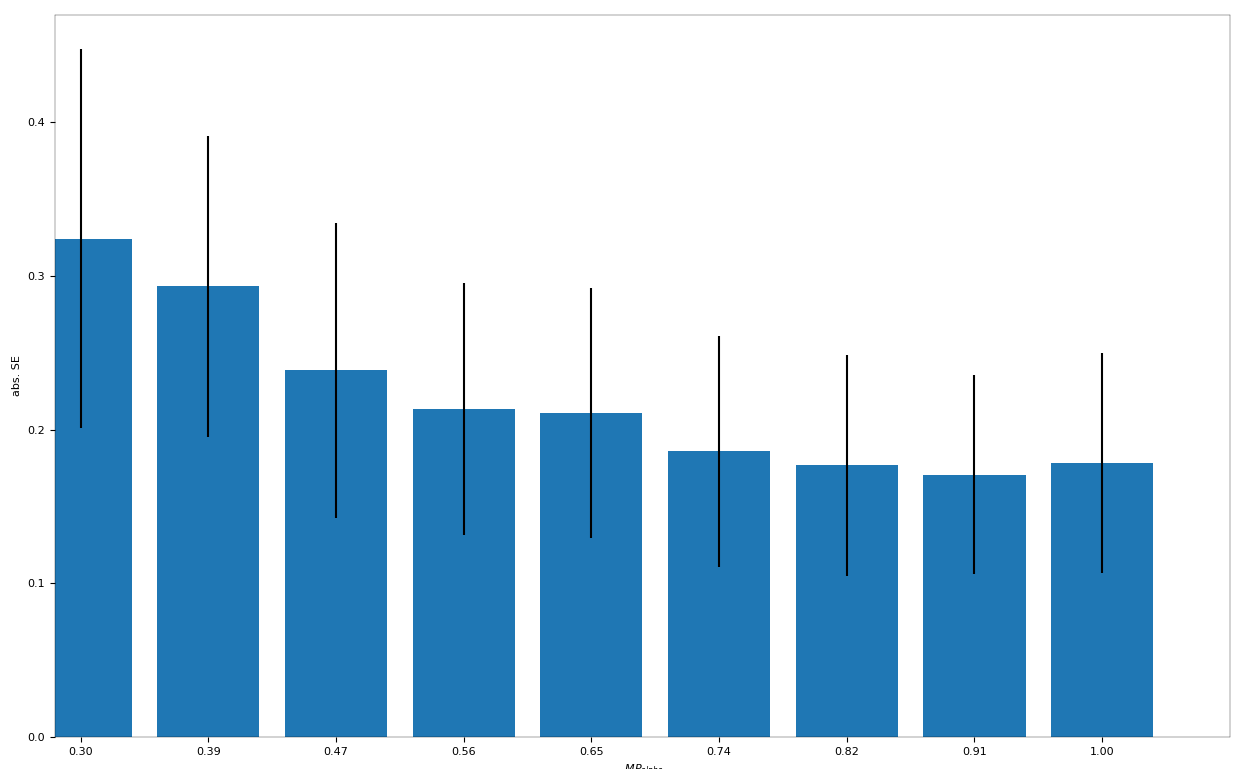

In [4]:
%run experiment_test_MP_alpha.py
fig

## Testing the color in LogGabor (alpha)

In [5]:
%%writefile experiment_test_alpha.py
#! /usr/bin/env python
# -*- coding: utf8 -*-
from __future__ import division, print_function
"""

Testing some parameters of the SparseEdges framework on its efficiency.

rm -fr cache/edges/testing_* cache/testing_* results/edges/testing_* results/testing_*
frioul_batch  -n "14,15,16"  -M 36 'python experiment_test_parameters.py'
frioul_batch -M 200 'python experiment_test_parameters.py'

"""
__author__ = "(c) Laurent Perrinet INT - CNRS"
import numpy as np
import matplotlib
matplotlib.use("Agg") # agg-backend, so we can create figures without x-server (no PDF, just PNG etc.)

from SparseEdges import SparseEdges
FORMATS = ['pdf', 'eps']

# TODO: here, we are more interested in the processing of the database, not the comparison - use the correct function
# TODO : annotate the efficiency of different LogGabor bases (RMSE?)
# TODO: make a circular mask to avoid border effects coming with whitening...

#! comparing databases
#!--------------------
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.N = 128
mp.pe.datapath = '../../SLIP/database/'
mp.process('testing_vanilla')
# TODO: CRF
mp.process('testing_noise', noise=mp.pe.noise)
mp.process('testing_vanilla', name_database='serre07_targets')

# TODO : make an experiment showing that using scale does not bring much
mps, experiments = [], []
v_alpha = np.linspace(0.3, 1., 9)
for alpha in v_alpha:
    mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
    mp.N = 128
    mp.pe.datapath = '../../SLIP/database/'
    mp.pe.alpha = alpha
    mp.init()
    exp = 'testing_alpha_' + str(alpha).replace('.', '_')
    mp.process(exp)
    experiments.append(exp)
    mps.append(mp)
    
import matplotlib.pyplot as plt
fig_width_pt = 900 #318.670*.61 # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
fig_width = fig_width_pt*inches_per_pt  # width in inches

threshold = None
threshold = .25
databases = ['serre07_distractors'] * len(experiments)
labels = ['%0.2f' % MP_alpha for MP_alpha in v_alpha]
fig = plt.figure(figsize=(fig_width, fig_width/1.618))
fig, a, ax = mp.plot(mps=mps,
                  experiments=experiments, databases=databases, labels=labels, 
                  fig=fig, color=[0., 1., 0.], threshold=threshold, scale=True)    
a.set_xlabel(r' $\alpha$')

import os
mp.savefig(fig, os.path.join(mp.pe.figpath, 'testing_alpha'), display=True)

Overwriting experiment_test_alpha.py


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


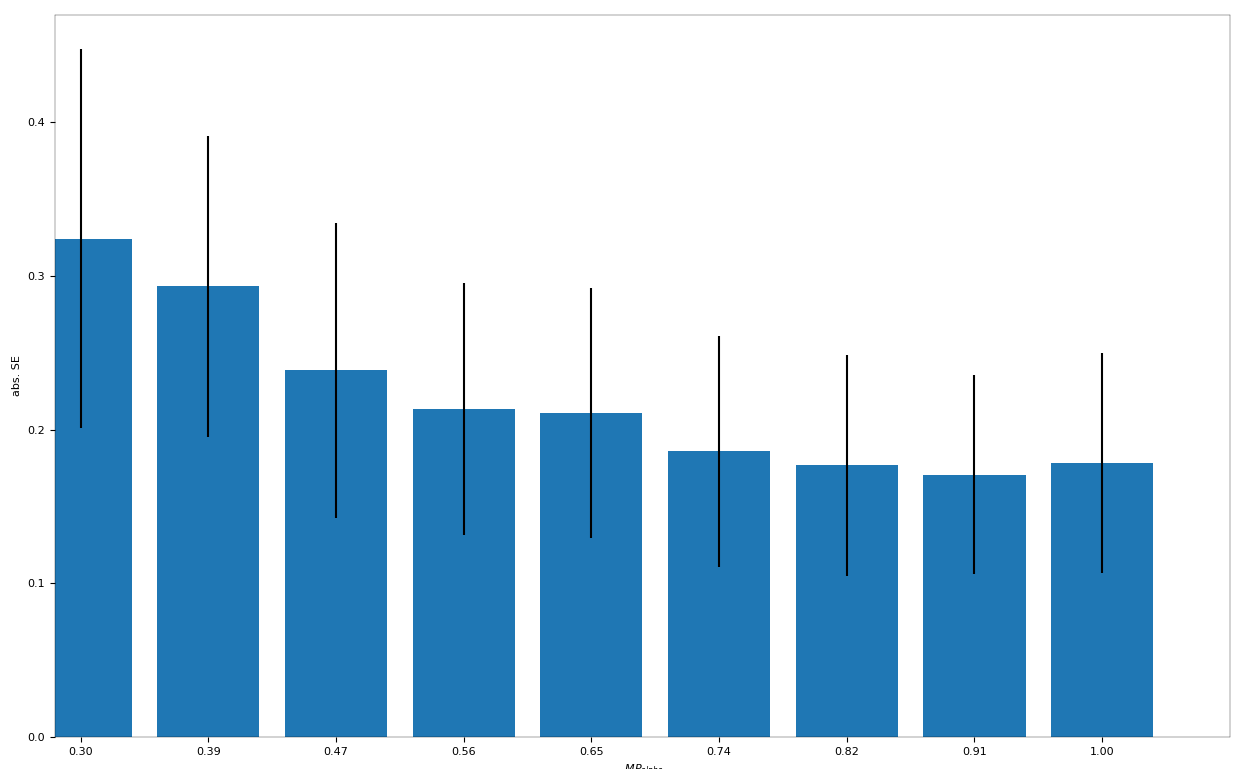

In [6]:
%run experiment_test_alpha.py
fig

## some book keeping for the notebook

In [7]:
%load_ext watermark
%watermark

2016-12-07T18:58:08+01:00

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)
system     : Darwin
release    : 16.1.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [8]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.38)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.12.0b1
scipy 0.18.1
matplotlib 2.0.0rc1
sympy 1.0
Wed Dec 07 18:58:09 2016 CET

In [9]:
%cd -q ../notebooks